In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from numpy import average
from scipy import stats, diff
from matplotlib import cm
from statistics import median
import gc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from sympy.physics.vector import curl
import math

%matplotlib inline


In [2]:
#BDD 

all_zostoga_bdd = xr.open_dataset("TS_YE/ALL_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
buoy_zostoga_bdd = xr.open_dataset("TS_YE/BUOY_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
ctl_zostoga_bdd = xr.open_dataset("TS_YE/CTL-nofrz_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
heat_zostoga_bdd = xr.open_dataset("TS_YE/HEAT_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
stress_zostoga_bdd = xr.open_dataset("TS_YE/STRESS_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
water_zostoga_bdd = xr.open_dataset("TS_YE/WATER_2000_2250_1M_scsshtst.nc", engine="netcdf4", decode_times=False)
                             
all_zos_bdd = xr.open_dataset("TS_YE/ALL_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
buoy_zos_bdd = xr.open_dataset("TS_YE/BUOY_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
ctl_zos_bdd = xr.open_dataset("TS_YE/CTL-nofrz_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
heat_zos_bdd = xr.open_dataset("TS_YE/HEAT_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
stress_zos_bdd = xr.open_dataset("TS_YE/STRESS_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
water_zos_bdd = xr.open_dataset("TS_YE/WATER_2000_2250_1M_sshdyn.nc", engine="netcdf4", decode_times=False)
                           
ds_area_Ofx = xr.open_dataset("areacello_Ofx_IPSL-CM6A-LR_piControl_r1i1p1f1_gn.nc")


In [3]:
all_zostoga = all_zostoga_bdd.scsshtst[:,0,0]
buoy_zostoga = buoy_zostoga_bdd.scsshtst[:,0,0]
ctl_zostoga = ctl_zostoga_bdd.scsshtst[:,0,0]
heat_zostoga = heat_zostoga_bdd.scsshtst[:,0,0]
stress_zostoga = stress_zostoga_bdd.scsshtst[:,0,0]
water_zostoga = water_zostoga_bdd.scsshtst[:,0,0]


In [4]:
all_zos = all_zos_bdd.sshdyn
buoy_zos = buoy_zos_bdd.sshdyn
ctl_zos = ctl_zos_bdd.sshdyn
heat_zos = heat_zos_bdd.sshdyn
stress_zos = stress_zos_bdd.sshdyn
water_zos = water_zos_bdd.sshdyn


In [92]:
lon = all_zos.nav_lon
lat = all_zos.nav_lat

In [5]:
ZOS = [ctl_zos,all_zos,heat_zos,water_zos,buoy_zos,stress_zos]

In [6]:
areacello = ds_area_Ofx.areacello

In [7]:
%store -r indice_ocean

In [8]:
#fait l'aire totale sur  océans

total_area_ocean = areacello.sum(['y','x'])
total_area_ocean

<xarray.DataArray 'areacello' ()>
array(3.6357714e+14, dtype=float32)

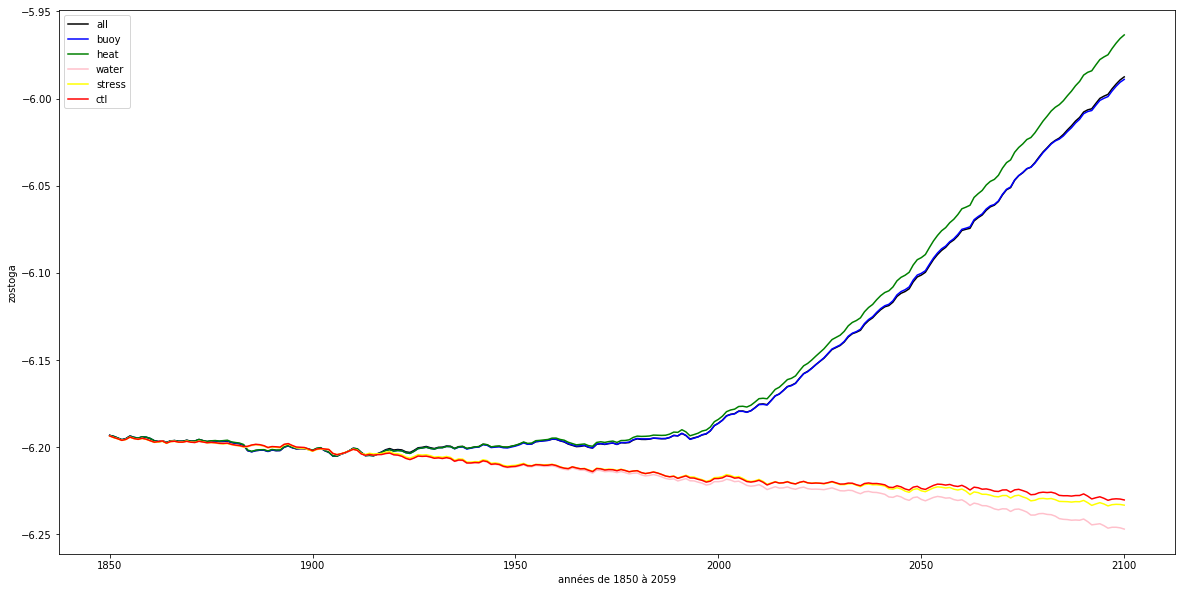

In [10]:
# sans enlever la dérive

x = [t for t in range(1850,2101)]

plt.figure(figsize=(20,10))

   
plt.plot(x, all_zostoga, "black", label='all')

plt.plot(x, buoy_zostoga, "blue", label='buoy')
plt.plot(x, heat_zostoga, "green", label='heat')
plt.plot(x, water_zostoga, "pink", label='water')
plt.plot(x, stress_zostoga, "yellow", label='stress')


plt.plot(x, ctl_zostoga, "r", label='ctl')


    
axes = plt.gca()
axes.set_xlabel('années de 1850 à 2059')
axes.set_ylabel('zostoga')
plt.legend()
plt.show()

In [10]:
x = [t for t in range(251)]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, ctl_zostoga)
slope, intercept

(-0.000142157894229328, -6.194874840247701)

In [11]:
#Construction de zostoga detrended

all_zostoga_det = all_zostoga.copy()
ctl_zostoga_det = ctl_zostoga.copy()
heat_zostoga_det = heat_zostoga.copy()
water_zostoga_det = water_zostoga.copy()
buoy_zostoga_det = buoy_zostoga.copy()
stress_zostoga_det = stress_zostoga.copy()

for t in range(251):
    
    all_zostoga_det[t] = all_zostoga[t,] - (slope*t + all_zostoga[0])
    ctl_zostoga_det[t] = ctl_zostoga[t,] - (slope*t + ctl_zostoga[0])
    heat_zostoga_det[t] = heat_zostoga[t,] - (slope*t + heat_zostoga[0])
    water_zostoga_det[t] = water_zostoga[t,] - (slope*t + water_zostoga[0])
    buoy_zostoga_det[t] = buoy_zostoga[t,] - (slope*t + buoy_zostoga[0])
    stress_zostoga_det[t] = stress_zostoga[t,] - (slope*t + stress_zostoga[0])


In [12]:
ZOSTOGA = [ctl_zostoga_det,all_zostoga_det,heat_zostoga_det,water_zostoga_det,buoy_zostoga_det,stress_zostoga_det]

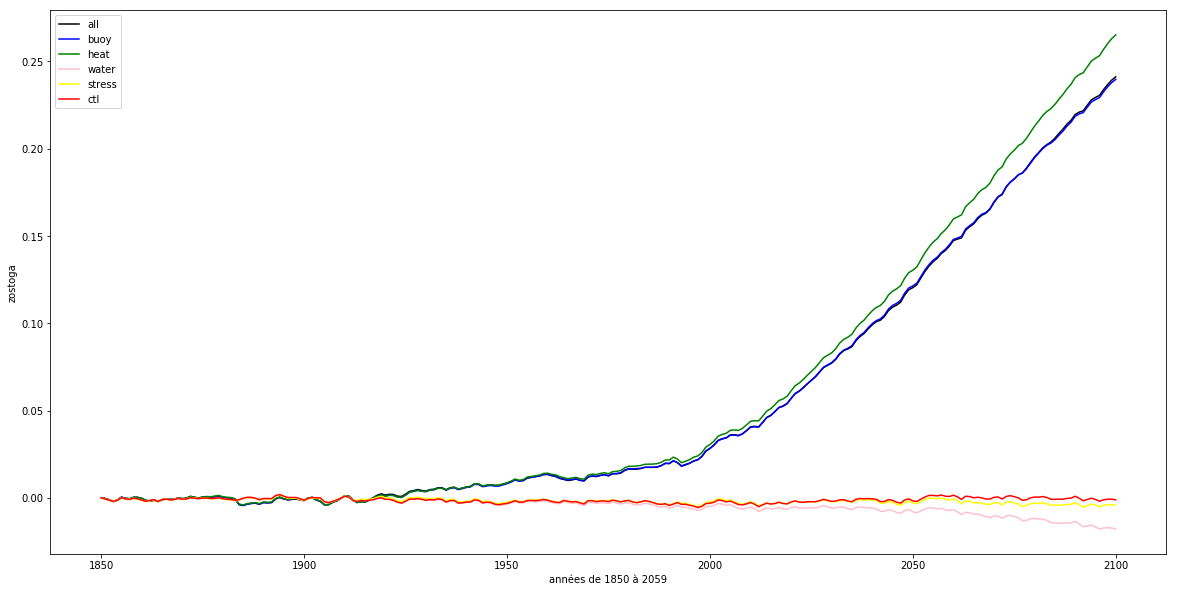

In [15]:
# sans la dérive

x = [t for t in range(1850,2101)]

plt.figure(figsize=(20,10))

   
plt.plot(x, all_zostoga_det, "black", label='all')

plt.plot(x, buoy_zostoga_det, "blue", label='buoy')
plt.plot(x, heat_zostoga_det, "green", label='heat')
plt.plot(x, water_zostoga_det, "pink", label='water')
plt.plot(x, stress_zostoga_det, "yellow", label='stress')


plt.plot(x, ctl_zostoga_det, "r", label='ctl')


    
axes = plt.gca()
axes.set_xlabel('années de 1850 à 2059')
axes.set_ylabel('zostoga')
plt.legend()
plt.show()

In [28]:

gmtsl_all = []
gmtsl_ctl = []
gmtsl_buoy = []
gmtsl_heat = []
gmtsl_water = []
gmtsl_stress = []

GMTSL = [gmtsl_ctl,gmtsl_all,gmtsl_heat,gmtsl_water,gmtsl_buoy,gmtsl_stress]

for t in range(251):
    for i in range(6):        
        GMTSL[i].append(ZOS[i][t,:,:] + float(ZOSTOGA[i][t]))


In [126]:
%store -r GMTSL

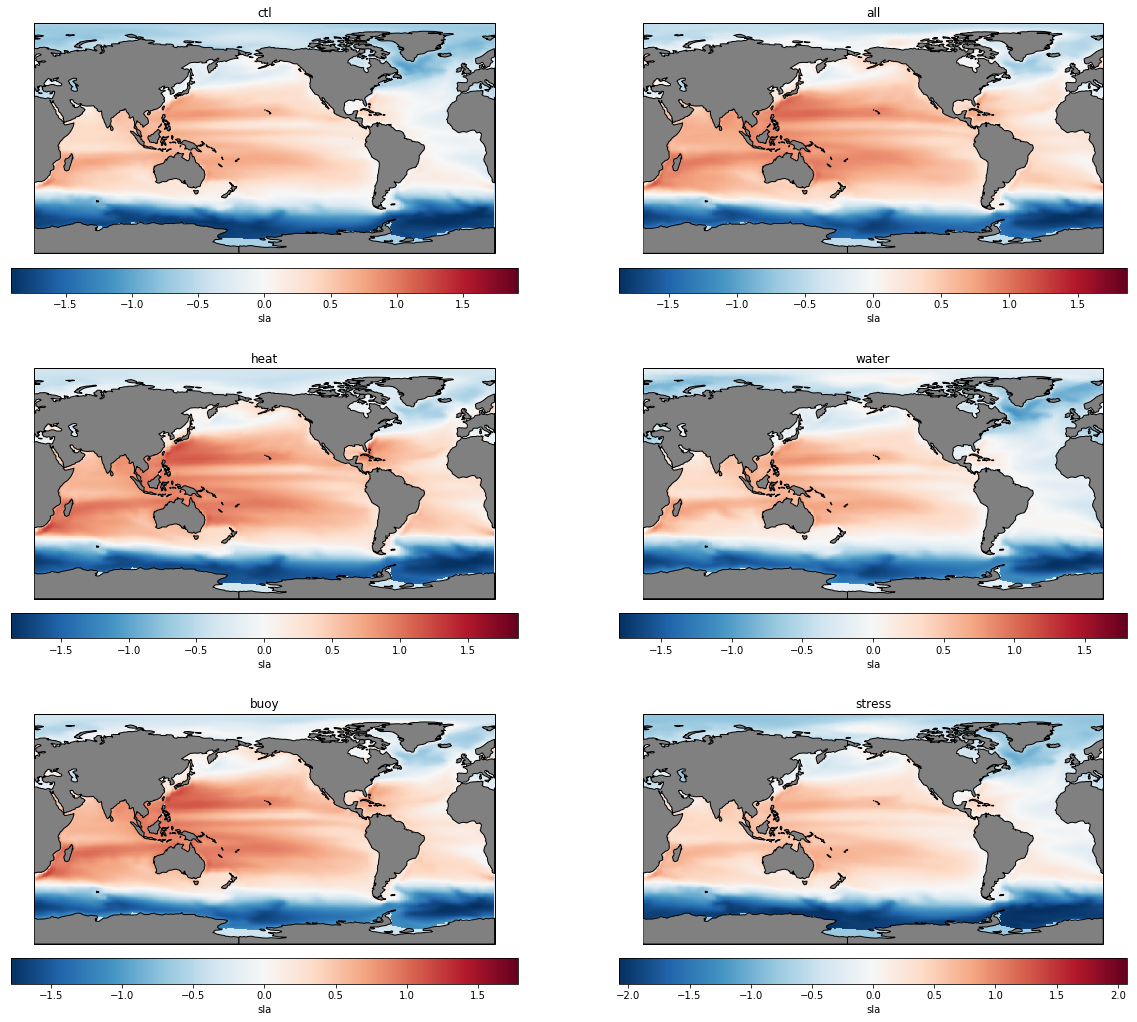

In [17]:
figTS,axes = plt.subplots(3,2,figsize=(20,18), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

AXES=[]
for i in range(3):
    for j in range(2):
        AXES.append(axes[i,j])


gmtsl_ctl[250].plot(ax=AXES[0],x='nav_lon', y='nav_lat',#cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='sla'))


gmtsl_all[250].plot(ax=AXES[1],x='nav_lon', y='nav_lat',#cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='sla'))



gmtsl_heat[250].plot(ax=AXES[2],x='nav_lon', y='nav_lat',#cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='sla'))


gmtsl_water[250].plot(ax=AXES[3],x='nav_lon', y='nav_lat',#cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='sla'))

gmtsl_buoy[250].plot(ax=AXES[4],x='nav_lon', y='nav_lat',#cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='sla'))


gmtsl_stress[250].plot(ax=AXES[5],x='nav_lon', y='nav_lat',#cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                        transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', pad=0.05, shrink=1, label='sla'))


                    
for i in range(6):
    AXES[i].add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')

AXES[0].title.set_text('ctl')
AXES[1].title.set_text('all')
AXES[2].title.set_text('heat')
AXES[3].title.set_text('water')
AXES[4].title.set_text('buoy')
AXES[5].title.set_text('stress')



# Bruit

In [10]:
SD_ctl = np.std(ctl_zos, axis=0) 

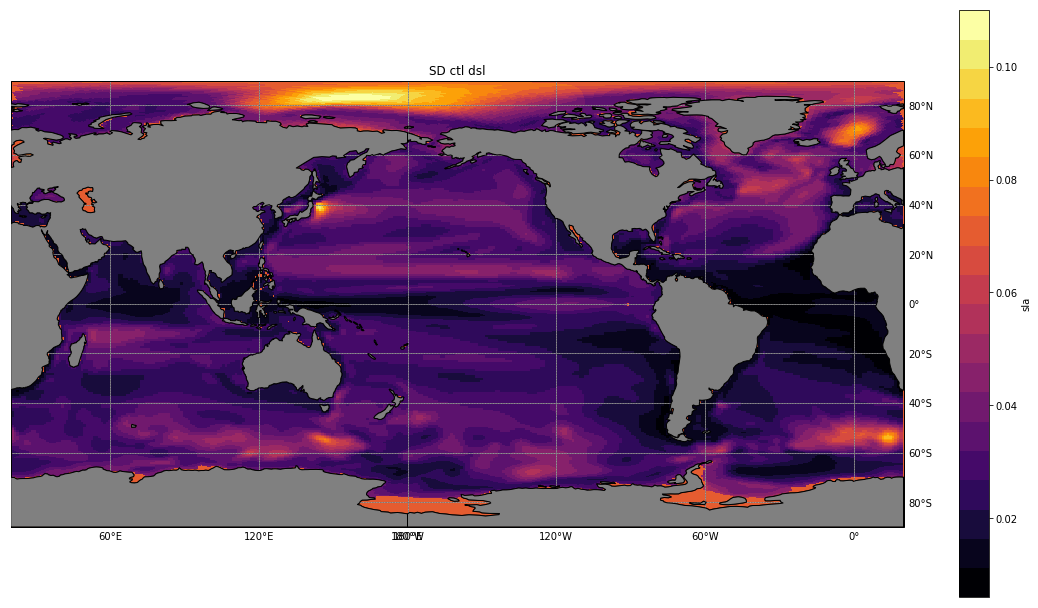

In [46]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

SD_ctl.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('inferno', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'))



ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('SD ctl dsl')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Pour DSL

In [11]:
# Moyenne de piC sur 200 ans 

zos_ctl_yearmean = np.nanmean(ctl_zos, axis=0)


/Users/loulou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


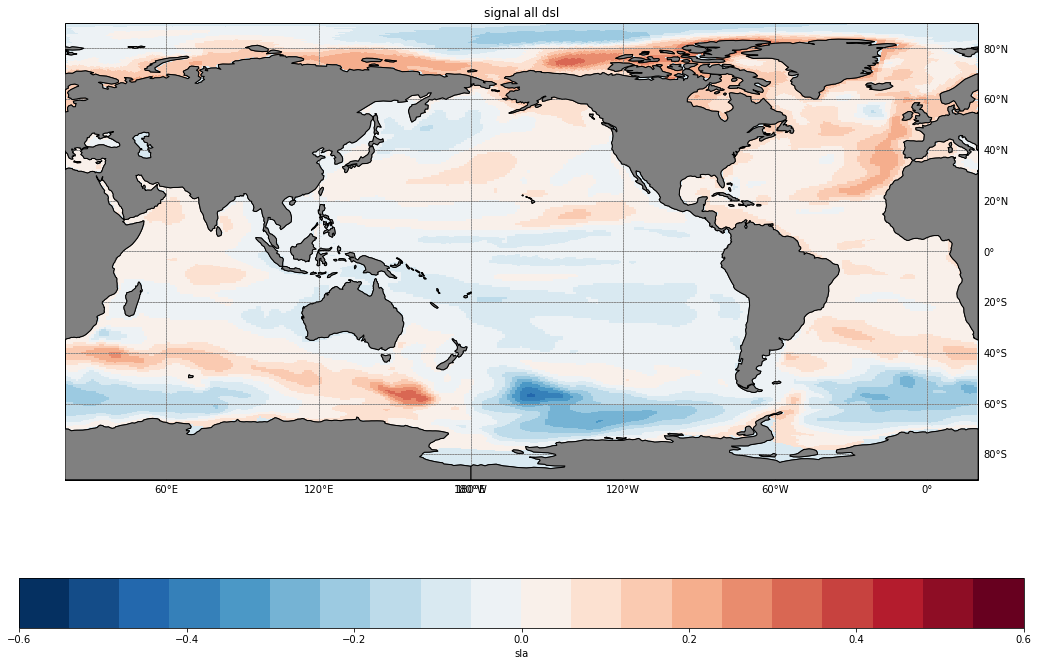

In [63]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(all_zos[250]-zos_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', shrink=0.9,label='sla'),vmin=-0.6,vmax=0.6)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal all dsl')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

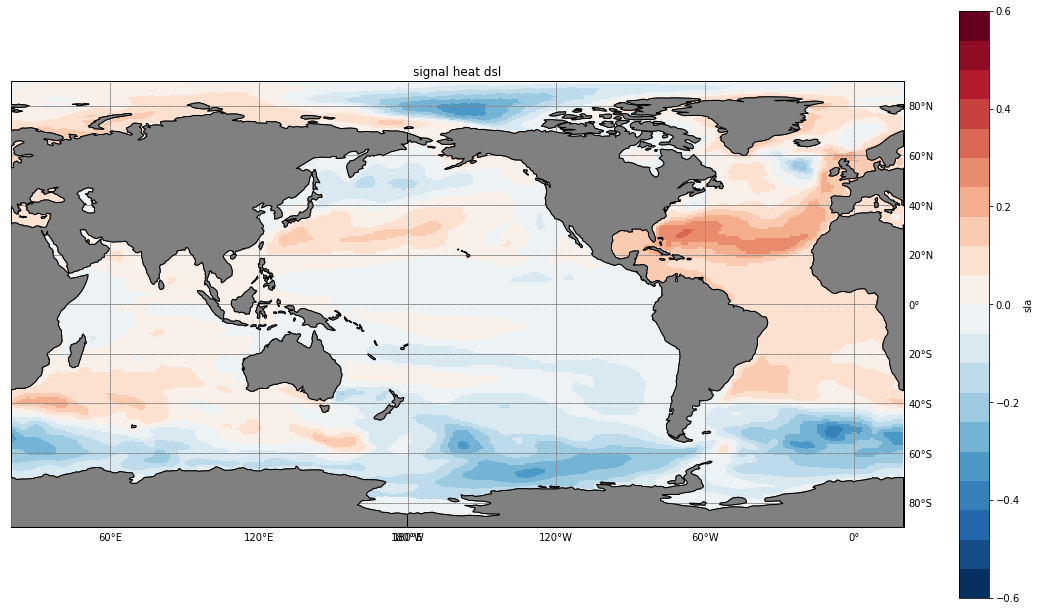

In [59]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(heat_zos[250]-zos_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.6,vmax=0.6)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal heat dsl')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

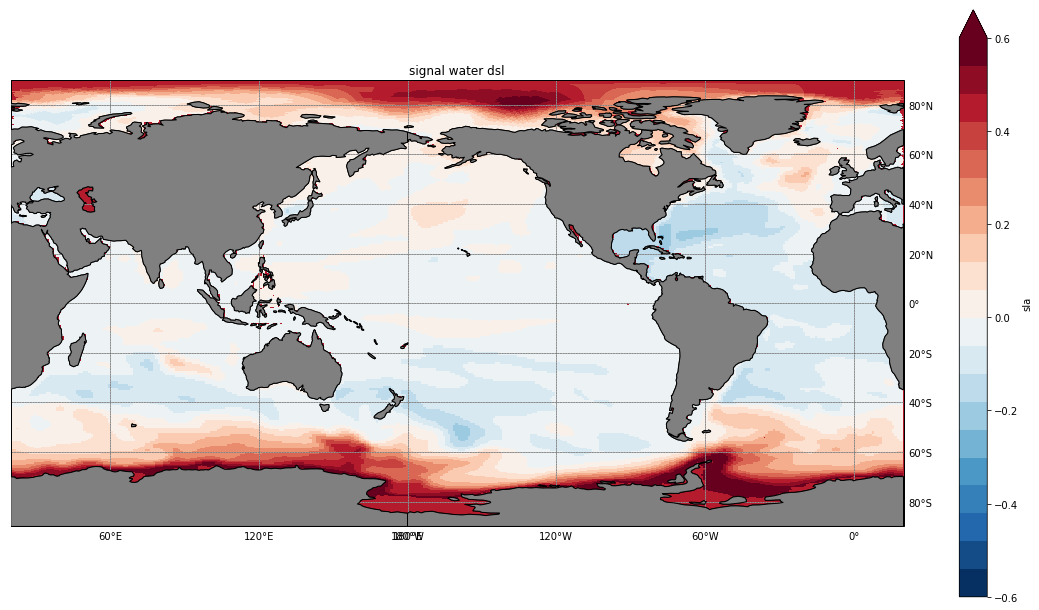

In [57]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(water_zos[250]-zos_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.6,vmax=0.6)



ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal water dsl')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

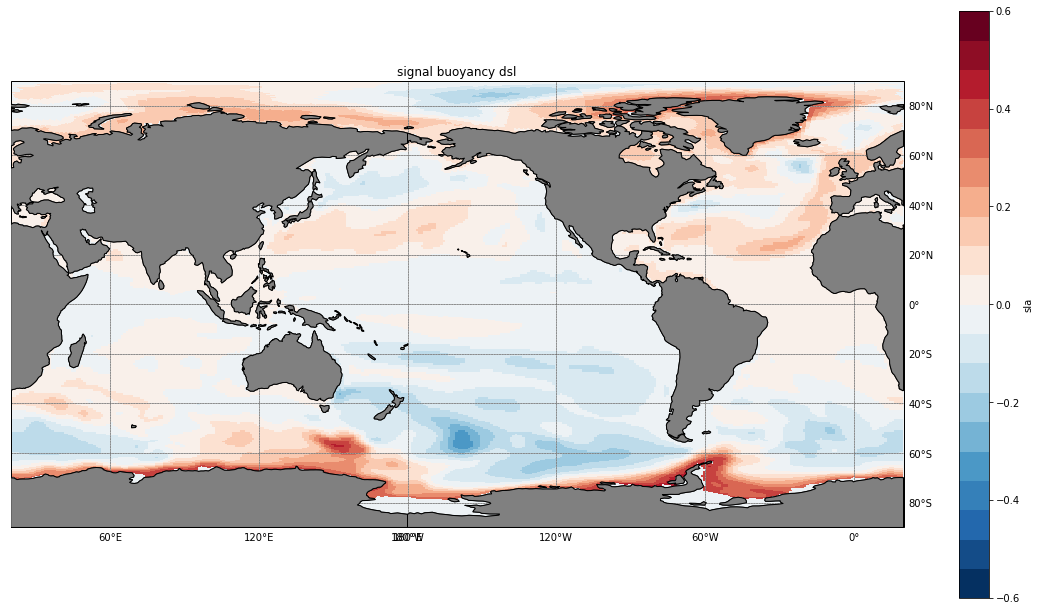

In [61]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(buoy_zos[250]-zos_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.6,vmax=0.6)




ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal buoyancy dsl')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

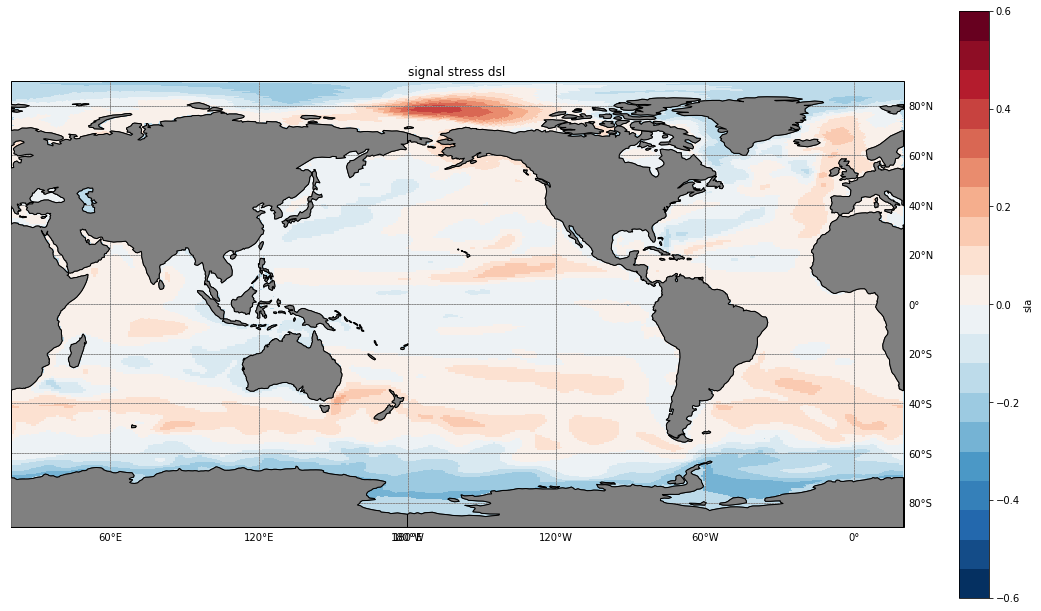

In [62]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(stress_zos[250]-zos_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.6,vmax=0.6)



ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal stress dsl')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [56]:
def SNR_zos(L):
    signal=[]
    for t in range(251):
        calcul = (L[t]-zos_ctl_yearmean)/SD_ctl
        signal.append(calcul)
    return signal

In [57]:
SNR_DSL_all = SNR_zos(all_zos)
SNR_DSL_heat = SNR_zos(heat_zos)
SNR_DSL_water = SNR_zos(water_zos)
SNR_DSL_buoy = SNR_zos(buoy_zos)
SNR_DSL_stress = SNR_zos(stress_zos)


In [ ]:
%time ToE_DSL_heat_pos = ToE_pos(SNR_DSL_heat)
%time ToE_DSL_heat_neg = ToE_neg(SNR_DSL_heat)

%time ToE_DSL_water_pos = ToE_pos(SNR_DSL_water)
%time ToE_DSL_water_neg = ToE_neg(SNR_DSL_water)

%time ToE_DSL_stress_pos = ToE_pos(SNR_DSL_stress)
%time ToE_DSL_stress_neg = ToE_neg(SNR_DSL_stress)

%time ToE_DSL_buoy_pos = ToE_pos(SNR_DSL_buoy)
%time ToE_DSL_buoy_neg = ToE_neg(SNR_DSL_buoy)

%time ToE_DSL_all_pos = ToE_pos(SNR_DSL_all)
%time ToE_DSL_all_neg = ToE_neg(SNR_DSL_all)

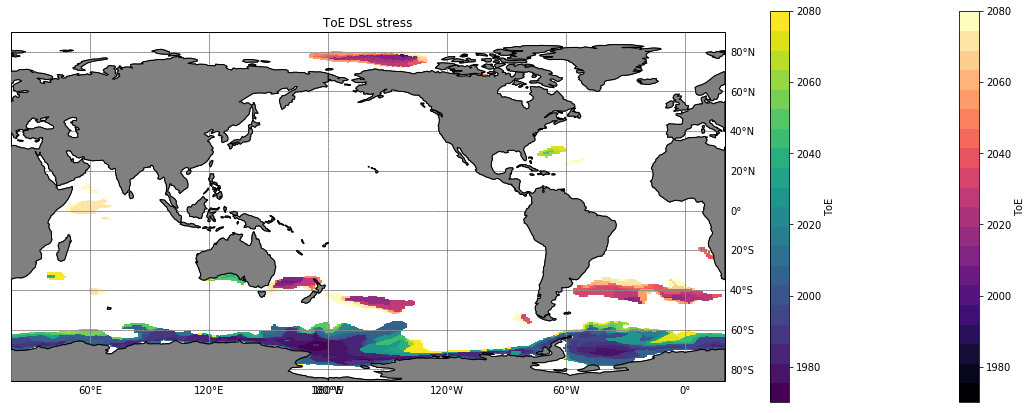

In [32]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_DSL_stress_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)

ToE_DSL_stress_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)



ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE DSL stress')



ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [75]:
ToE_DSL_heat_pos = ToE_DSL_heat_pos - 150
ToE_DSL_heat_neg = ToE_DSL_heat_neg - 150

ToE_DSL_water_pos = ToE_DSL_water_pos -150
ToE_DSL_water_neg = ToE_DSL_water_neg -150

ToE_DSL_stress_pos = ToE_DSL_stress_pos -150
ToE_DSL_stress_neg = ToE_DSL_stress_neg - 150

ToE_DSL_buoy_pos = ToE_DSL_buoy_pos -150
ToE_DSL_buoy_neg = ToE_DSL_buoy_neg -150
                           
ToE_DSL_all_pos = ToE_DSL_all_pos -150
ToE_DSL_all_neg = ToE_DSL_all_neg -150

In [12]:
%store -r ToE_DSL_heat_pos
%store -r ToE_DSL_heat_neg

%store -r ToE_DSL_water_pos  
%store -r ToE_DSL_water_neg

%store -r ToE_DSL_stress_pos
%store -r ToE_DSL_stress_neg

%store -r ToE_DSL_buoy_pos
%store -r ToE_DSL_buoy_neg

%store -r ToE_DSL_all_pos
%store -r ToE_DSL_all_neg


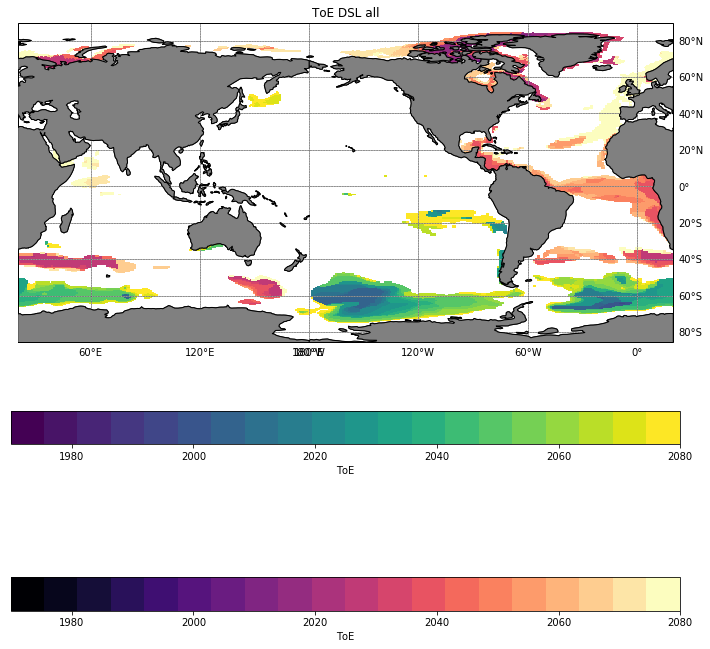

In [45]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_DSL_all_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)

ToE_DSL_all_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE DSL all')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

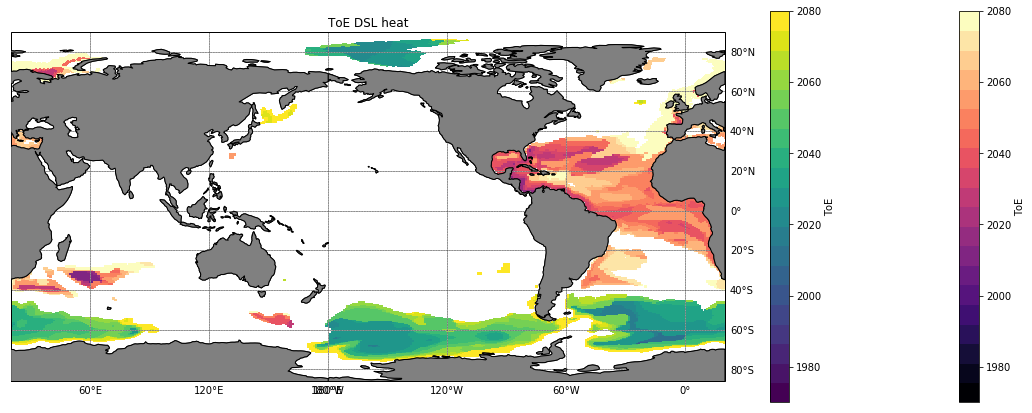

In [33]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_DSL_heat_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)

ToE_DSL_heat_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE DSL heat')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

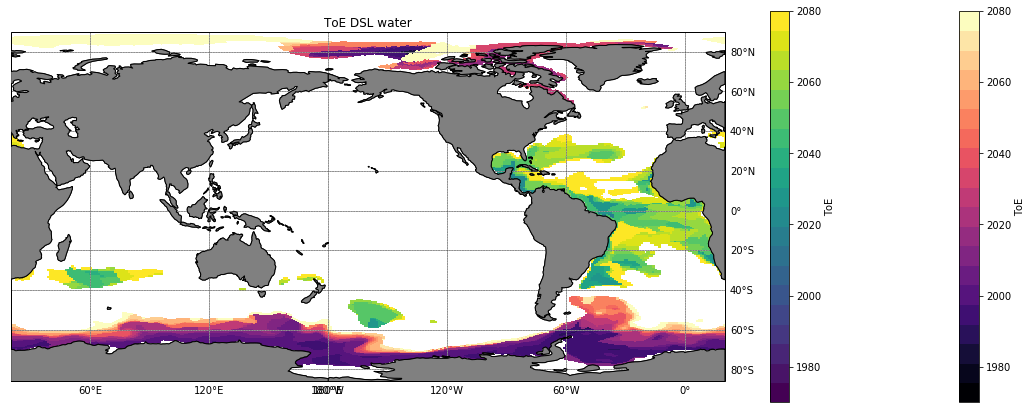

In [35]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_DSL_water_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)

ToE_DSL_water_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE DSL water')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

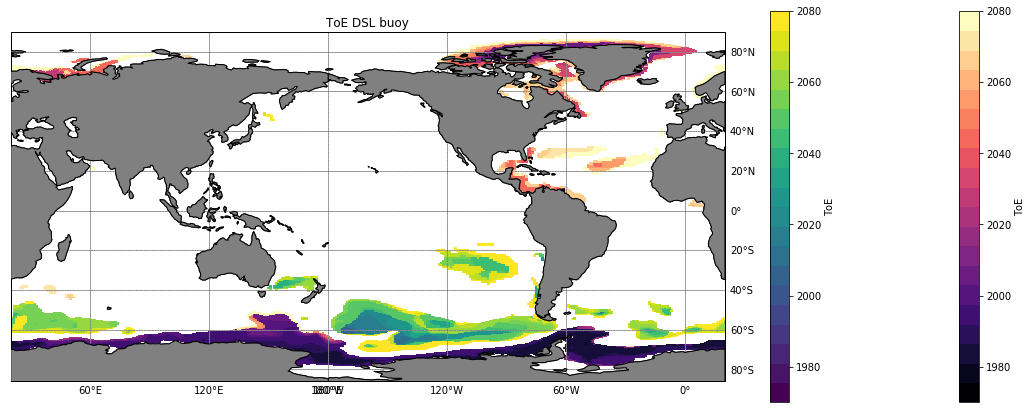

In [36]:

import matplotlib.pyplot as plt
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_DSL_buoy_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)

ToE_DSL_buoy_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)



ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE DSL buoy')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

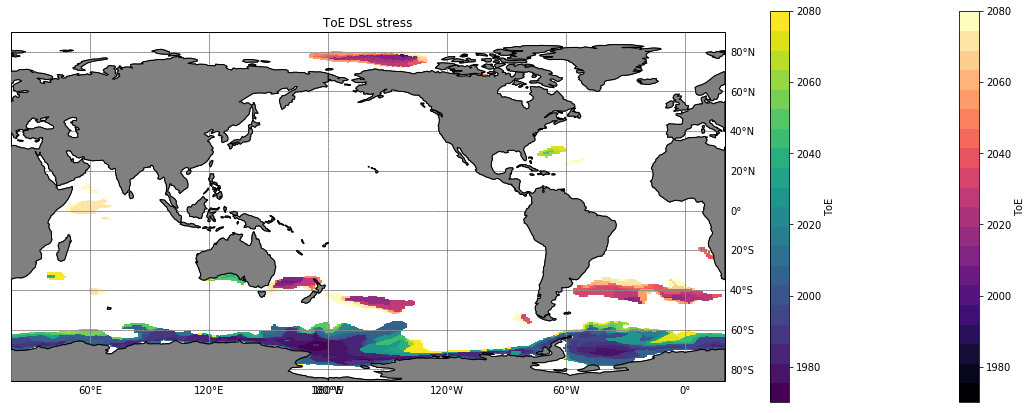

In [44]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_DSL_stress_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)


ToE_DSL_stress_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.6,label='ToE'),vmin=1970,vmax=2080)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE DSL stress')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Signal

In [19]:
# Moyenne de piC sur 200 ans 

gmtsl_ctl_yearmean = np.nanmean(gmtsl_ctl, axis=0)


/Users/loulou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
gmtsl_ctl_yearmean_array = SD_ctl.copy()

for y in range(332):
    for x in range(362):
        gmtsl_ctl_yearmean_array[y,x]= gmtsl_ctl_yearmean[y,x]

In [29]:
gmtsl_ctl_yearmean = gmtsl_ctl_yearmean_array

In [120]:
%store -r gmtsl_ctl_yearmean

In [27]:
def SNR(L):
    signal=[]
    for t in range(251):
        calcul = (L[t]-gmtsl_ctl_yearmean)/SD_ctl
        signal.append(calcul)
    return signal

In [115]:
SNR_all = SNR(gmtsl_all)
SNR_heat = SNR(gmtsl_heat)
SNR_water = SNR(gmtsl_water)
SNR_buoy = SNR(gmtsl_buoy)
SNR_stress = SNR(gmtsl_stress)


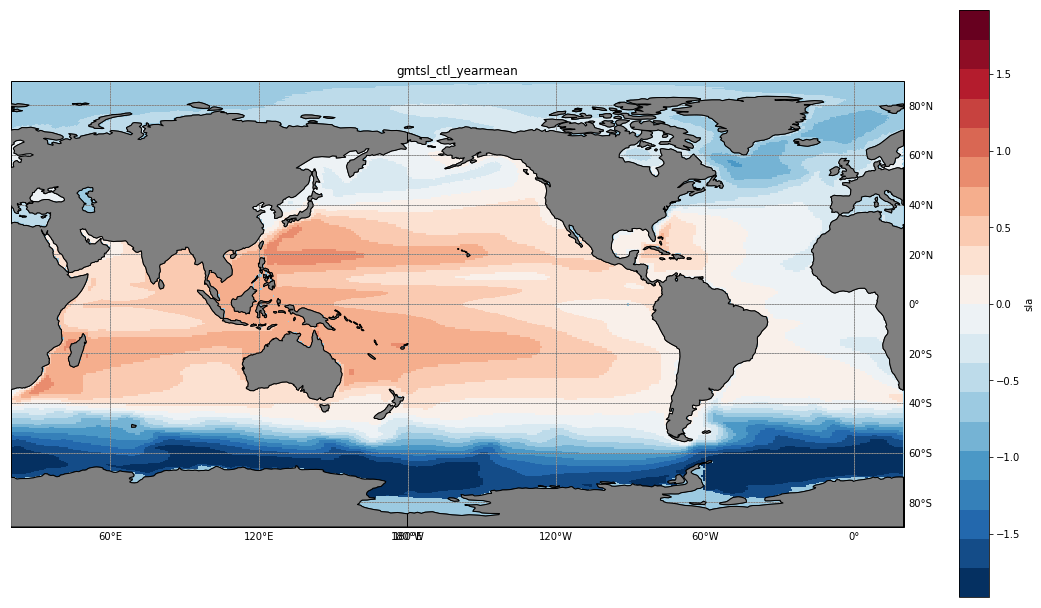

In [122]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(gmtsl_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'))


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('gmtsl_ctl_yearmean')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

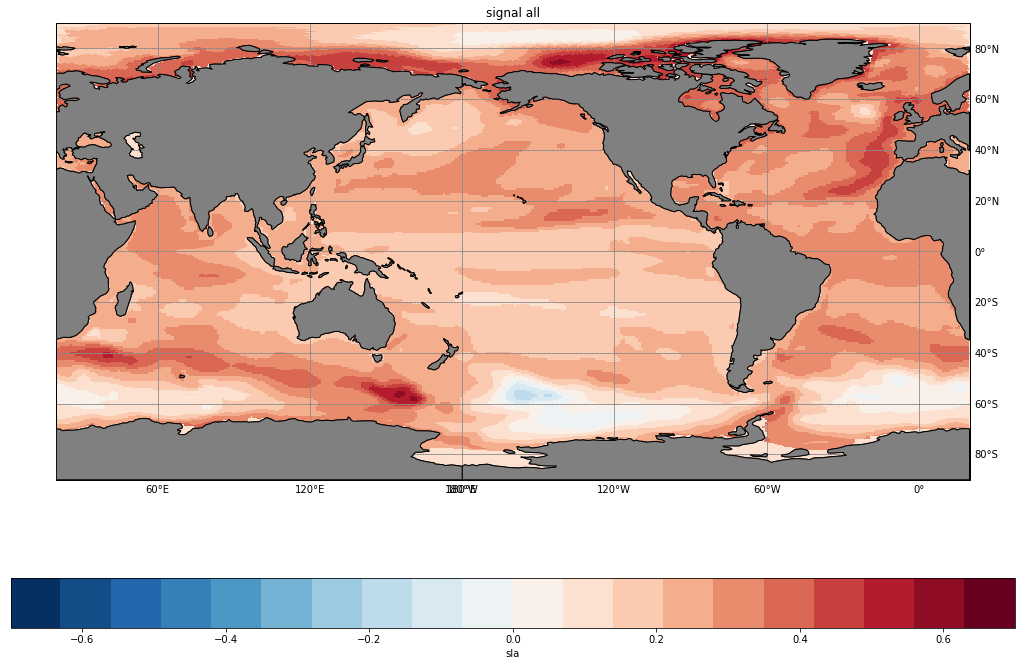

In [138]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(GMTSL[1][250]-gmtsl_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', shrink=0.9,label='sla'),vmin=-0.7,vmax=0.7)



ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal all')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

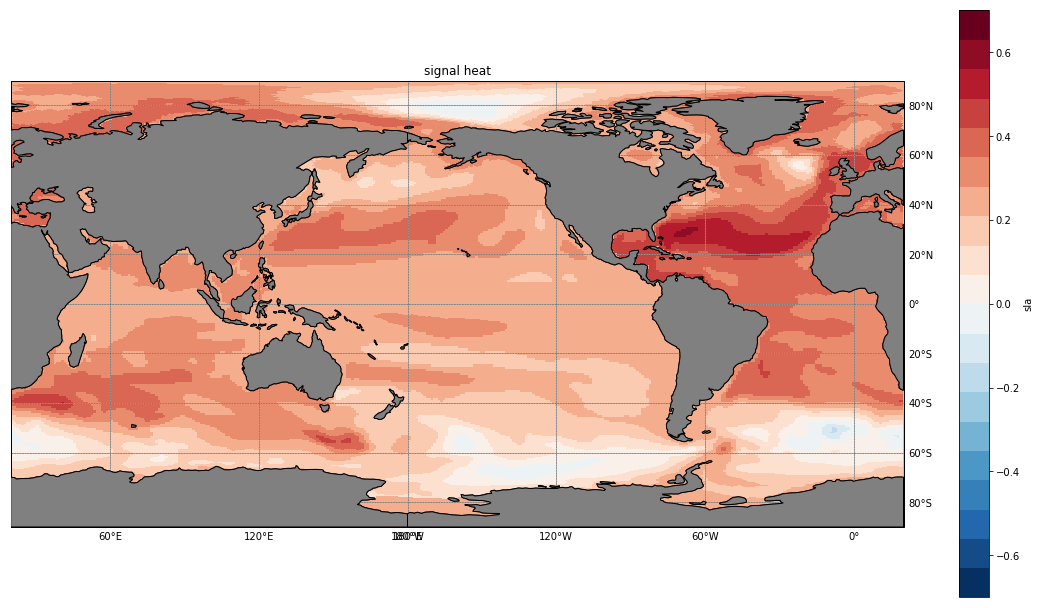

In [133]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(GMTSL[2][250] -gmtsl_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.7,vmax=0.7)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal heat')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

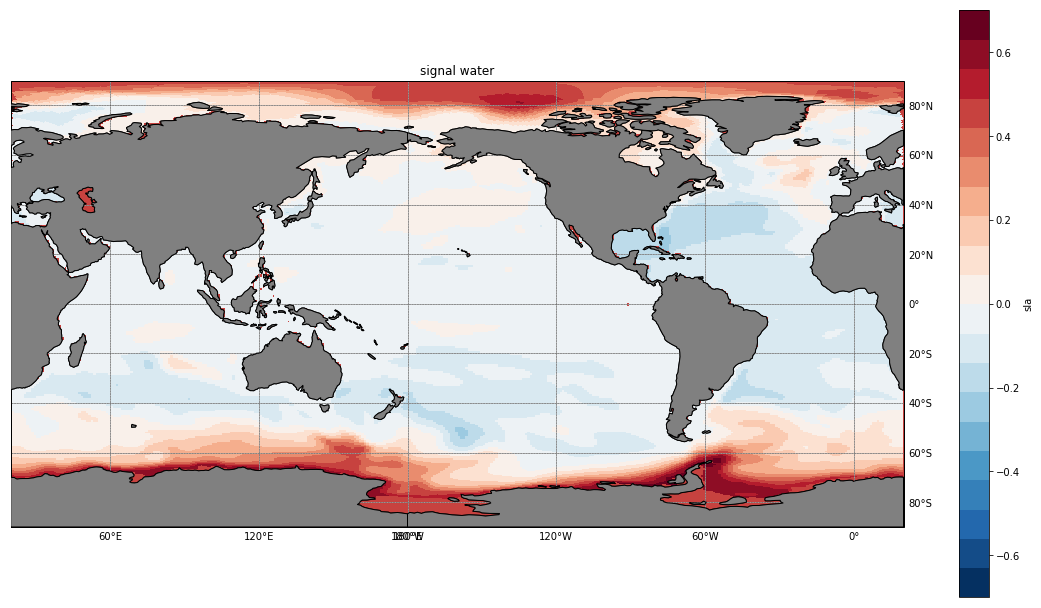

In [132]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(GMTSL[3][250]-gmtsl_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.7,vmax=0.7)



ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal water')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

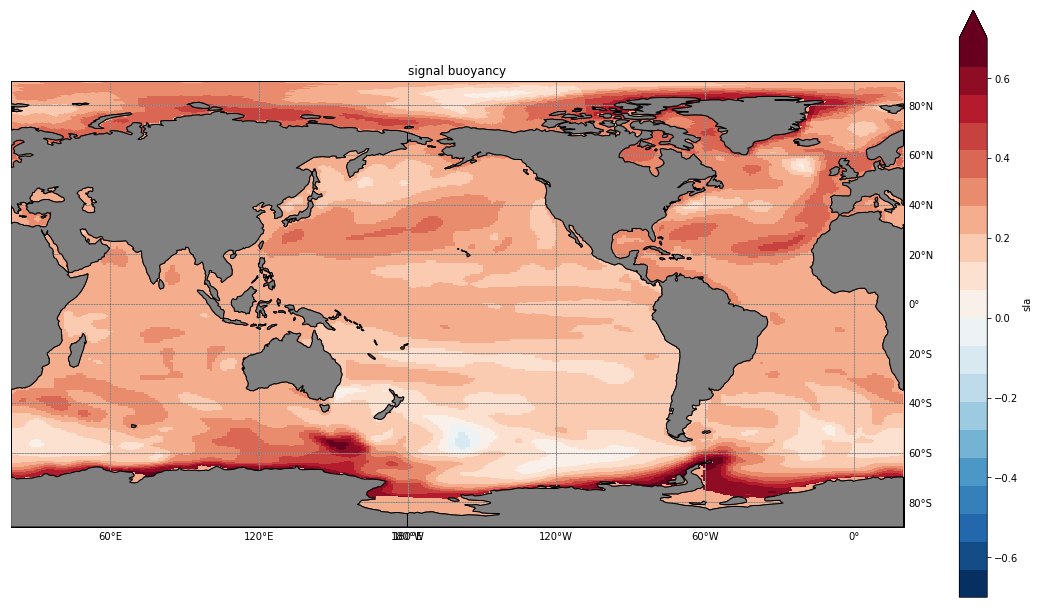

In [137]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(GMTSL[4][250]-gmtsl_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.7,vmax=0.7)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal buoyancy')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

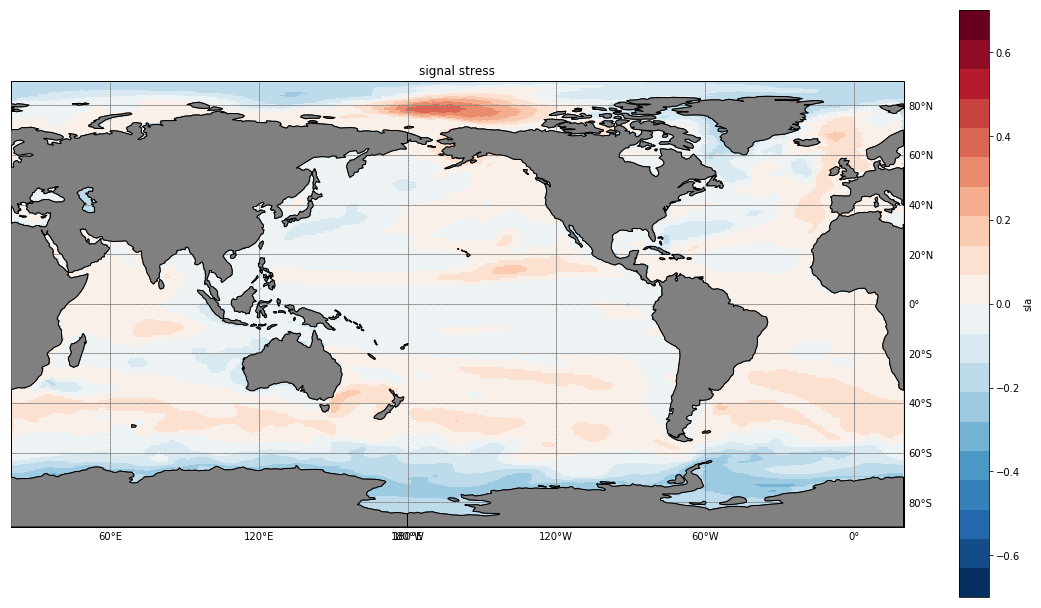

In [139]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

(GMTSL[5][250]-gmtsl_ctl_yearmean).plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('RdBu_r', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'),vmin=-0.7,vmax=0.7)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal stress')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

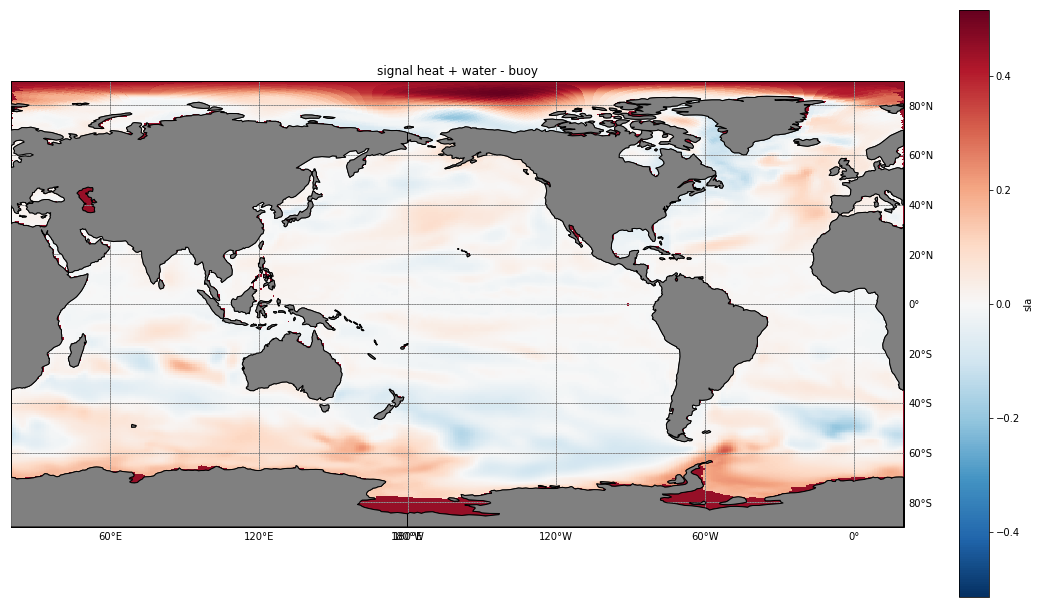

In [40]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

((gmtsl_heat[250]+gmtsl_water[250]-2*gmtsl_ctl_yearmean) - (gmtsl_buoy[250]-gmtsl_ctl_yearmean)).plot(ax=ax,x='nav_lon', y='nav_lat',#cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='sla'))


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('signal heat + water - buoy')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [112]:
def ToE_pos(L):
    
    ToE = gmtsl_ctl[0].copy()
    
    for y in range(332):

        for x in range(362):
            
            t=250        
            while (float(L[t][y,x]))>=5 and t>0 :
                t =t-1
         
            C = 250 - (t+1)
        
            if C>=20:
                ToE[y,x]=2000+(t+1)
        
            else:
                ToE[y,x]=np.nan
            
            
    return ToE

In [113]:
def ToE_neg(L):
    
    ToE = gmtsl_ctl[0].copy()
    
    for y in range(332):

        for x in range(362):
            
            t=250        
            while (float(L[t][y,x]))<=-5 and t>0 :
                t =t-1
         
            C = 250 - (t+1)
        
            if C>=20:
                ToE[y,x]=2000+(t+1)
        
            else:
                ToE[y,x]=np.nan
            
            
    return ToE

In [ ]:
%time ToE_heat_pos_5 = ToE_pos(SNR_heat)
%time ToE_heat_neg_5 = ToE_neg(SNR_heat)

%time ToE_water_pos_5 = ToE_pos(SNR_water)
%time ToE_water_neg_5 = ToE_neg(SNR_water)

%time ToE_stress_pos_5 = ToE_pos(SNR_stress)
%time ToE_stress_neg_5 = ToE_neg(SNR_stress)

%time ToE_buoy_pos_5 = ToE_pos(SNR_buoy)
%time ToE_buoy_neg_5 = ToE_neg(SNR_buoy)

%time ToE_all_pos_5 = ToE_pos(SNR_all)
%time ToE_all_neg_5 = ToE_neg(SNR_all)

In [ ]:
%time ToE_water = ToE_pos(SNR_water)

In [29]:
ToE_water_pos = ToE_water

In [ ]:
%time ToE_water_neg = ToE_neg(SNR_water)

In [67]:
%store -r ToE_water_pos
%store -r ToE_water_neg

In [ ]:
%time ToE_heat_pos = ToE_pos(SNR_heat)
%time ToE_heat_neg = ToE_neg(SNR_heat)

%time ToE_stress_pos = ToE_pos(SNR_stress)
%time ToE_stress_neg = ToE_neg(SNR_stress)

%time ToE_buoy_pos = ToE_pos(SNR_buoy)
%time ToE_buoy_neg = ToE_neg(SNR_buoy)

%time ToE_all_pos = ToE_pos(SNR_all)
%time ToE_all_neg = ToE_neg(SNR_all)


In [65]:
%store -r ToE_heat_pos
%store -r ToE_heat_neg

%store -r ToE_stress_pos
%store -r ToE_stress_neg

%store -r ToE_buoy_pos
%store -r ToE_buoy_neg

%store -r ToE_all_pos
%store -r ToE_all_neg

In [109]:
%store ToE_heat_pos
%store ToE_heat_neg

%store ToE_stress_pos
%store ToE_stress_neg

%store ToE_buoy_pos
%store ToE_buoy_neg

%store ToE_all_pos
%store ToE_all_neg

Stored 'ToE_heat_pos' (DataArray)
Stored 'ToE_heat_neg' (DataArray)
Stored 'ToE_stress_pos' (DataArray)
Stored 'ToE_stress_neg' (DataArray)
Stored 'ToE_buoy_pos' (DataArray)
Stored 'ToE_buoy_neg' (DataArray)
Stored 'ToE_all_pos' (DataArray)
Stored 'ToE_all_neg' (DataArray)


In [51]:
ToE_simus_pos = [ToE_all_pos,ToE_heat_pos,ToE_water_pos,ToE_buoy_pos,ToE_stress_pos]
ToE_simus_neg = [ToE_all_neg,ToE_heat_neg,ToE_water_neg,ToE_buoy_neg,ToE_stress_neg]

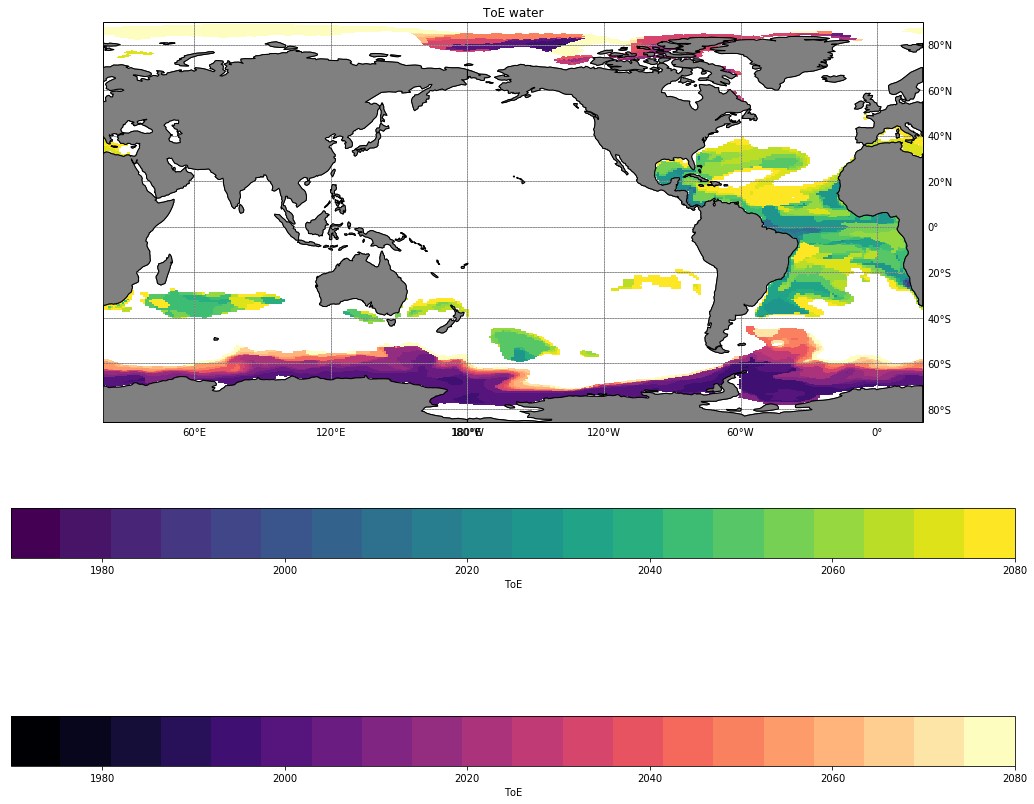

In [116]:
figTS,ax = plt.subplots(1,1,figsize=(20,15), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_water_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', shrink=0.9,label='ToE'),vmin=1970,vmax=2080)

ToE_water_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='horizontal', shrink=0.9,label='ToE'),vmin=1970,vmax=2080)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE water')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

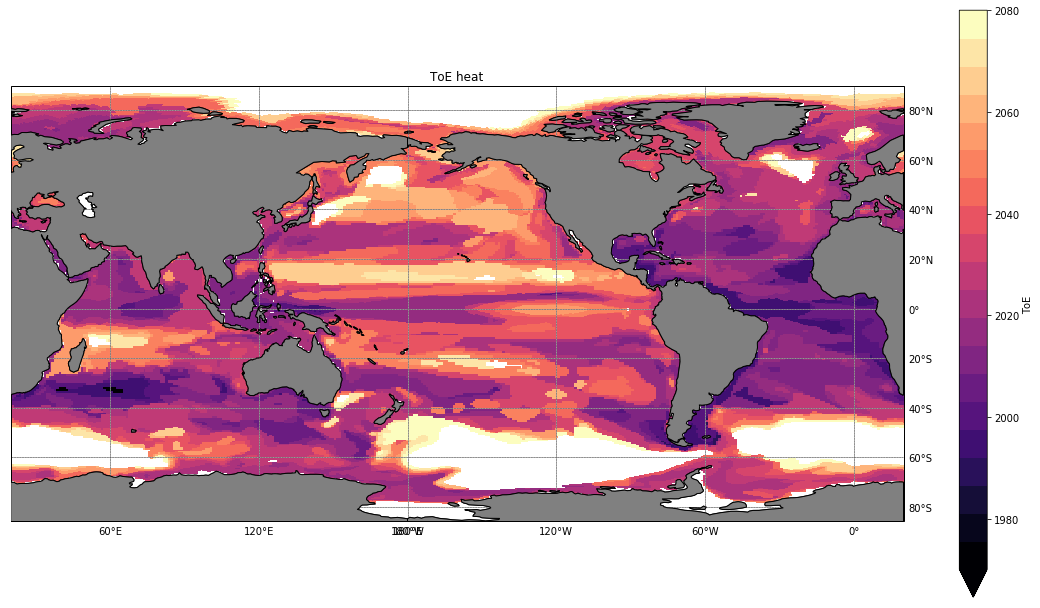

In [115]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_heat_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='ToE'),vmin=1970,vmax=2080)

#ToE_heat_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
#                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='ToE'))

#ToE_heat_pos.plot.contour(level=2020)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE heat')




ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True


gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

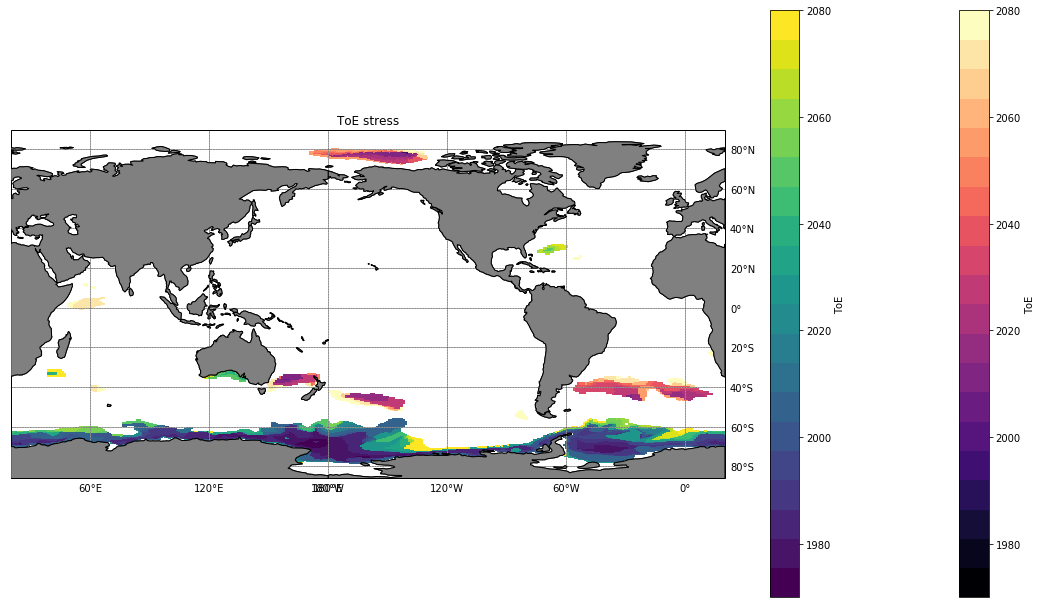

In [117]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_stress_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='ToE'),vmin=1970,vmax=2080)

ToE_stress_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='ToE'),vmin=1970,vmax=2080)

#ToE_stress_neg.plot.contour(levels=[2020])

ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE stress')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

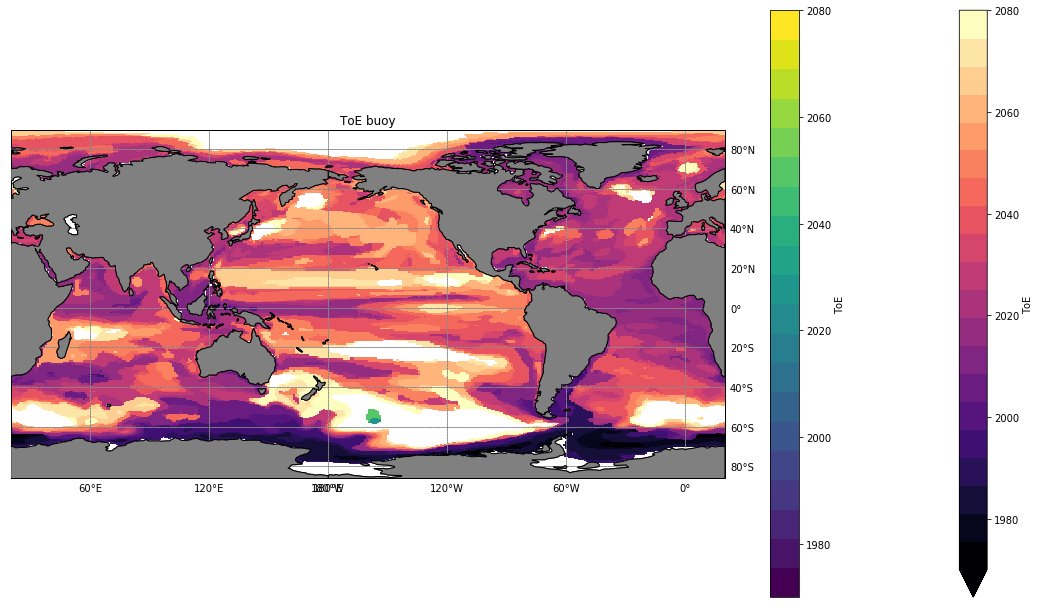

In [118]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_buoy_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='ToE'),vmin=1970,vmax=2080)

ToE_buoy_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='ToE'),vmin=1970,vmax=2080)


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE buoy')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

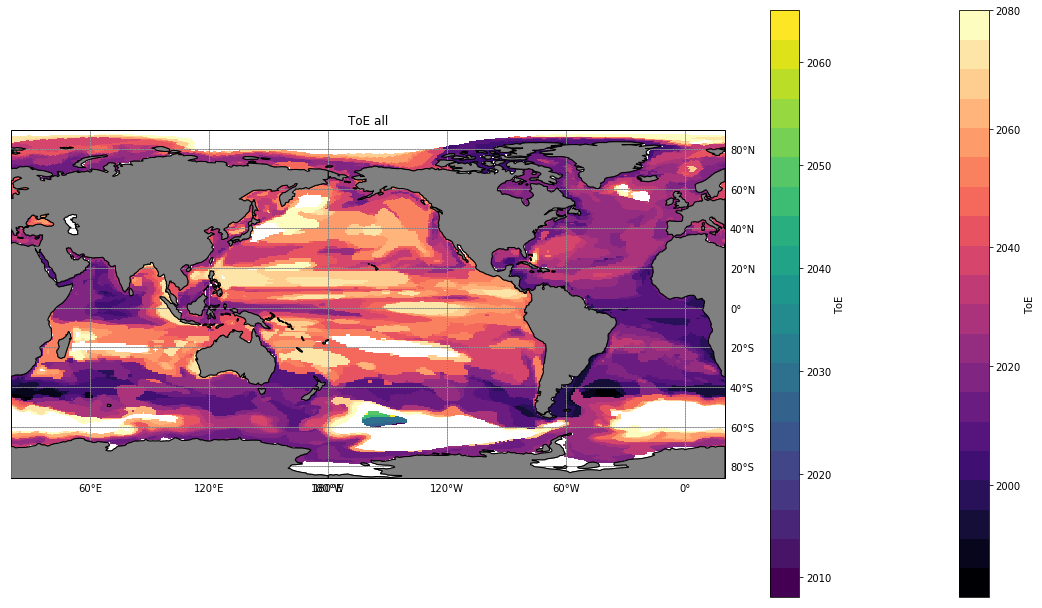

In [43]:
figTS,ax = plt.subplots(1,1,figsize=(20,12), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-160.0)})

ToE_all_pos.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('magma', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='ToE'))

ToE_all_neg.plot(ax=ax,x='nav_lon', y='nav_lat',cmap=plt.cm.get_cmap('viridis', 20),#plt.cm.get_cmap('turbo', 20)
                   transform=ccrs.PlateCarree(),cbar_kwargs=dict(orientation='vertical', shrink=0.9,label='ToE'))


ax.gridlines()
cs = ax.coastlines(resolution='110m', linewidth=1)

ax.set_title('ToE all')


ax.add_feature(cartopy.feature.LAND,facecolor='grey',zorder=100, edgecolor='k')
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right=True
gl.xlines = True

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Box Plot

In [81]:
SNR_all_L = []
SNR_heat_L = []
SNR_water_L = []
SNR_buoy_L = []
SNR_stress_L = []

for i in range(251):
    SNR_all_L.append(float((np.nansum((SNR_all[i]*areacello), axis=(0,1)))/total_area_ocean))
    SNR_heat_L.append(float((np.nansum((SNR_heat[i]*areacello), axis=(0,1)))/total_area_ocean))
    SNR_water_L.append(float((np.nansum((SNR_water[i]*areacello), axis=(0,1)))/total_area_ocean))
    SNR_buoy_L.append(float((np.nansum((SNR_buoy[i]*areacello), axis=(0,1)))/total_area_ocean))
    SNR_stress_L.append(float((np.nansum((SNR_stress[i]*areacello), axis=(0,1)))/total_area_ocean))


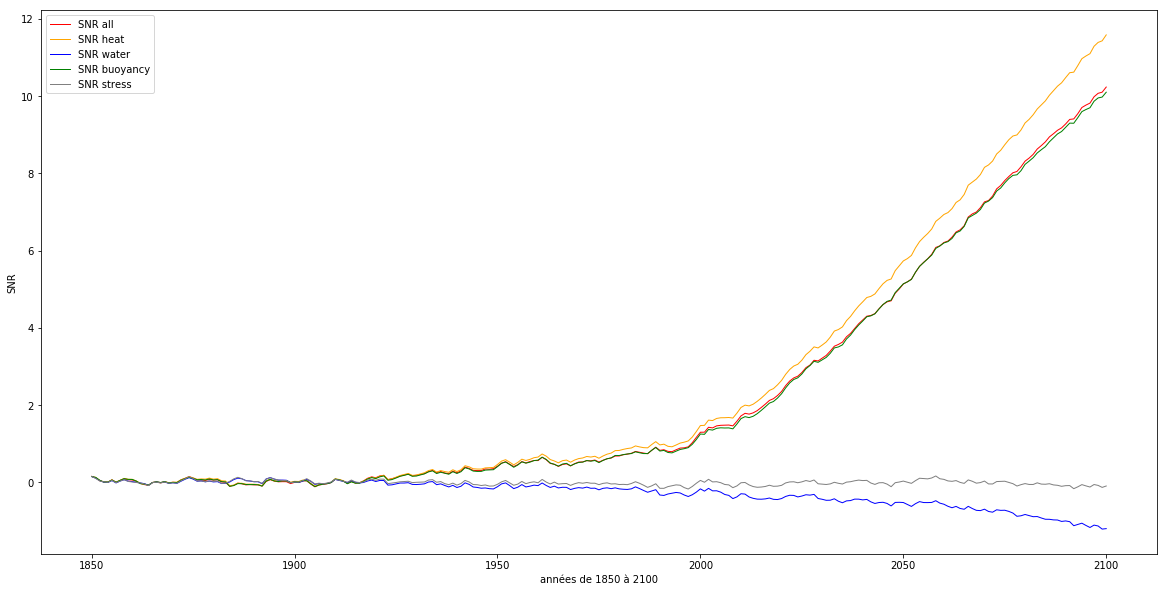

In [97]:
x = [i for i in range(1850,2101)]


plt.figure(figsize=(20,10))

plt.plot(x,SNR_all_L,"red", linewidth=1,label="SNR all")
plt.plot(x,SNR_heat_L,"orange", linewidth=1,label="SNR heat")
plt.plot(x,SNR_water_L,"blue", linewidth=1,label="SNR water")
plt.plot(x,SNR_buoy_L,"green", linewidth=1,label="SNR buoyancy")
plt.plot(x,SNR_stress_L,"grey", linewidth=1,label="SNR stress")


axes = plt.gca()
axes.set_xlabel('années de 1850 à 2100')
axes.set_ylabel("SNR")
plt.legend()
plt.show()

In [126]:
#Quartiles


Quart_all = (np.nanpercentile(ToE_all_pos, [25, 50, 75])+np.nanpercentile(ToE_all_neg, [25, 50, 75]))/2
Quart_heat = np.nanpercentile(ToE_heat_pos, [25, 50, 75])
Quart_water = (np.nanpercentile(ToE_water_pos, [25, 50, 75])+np.nanpercentile(ToE_water_neg, [25, 50, 75]))/2
Quart_buoy = (np.nanpercentile(ToE_buoy_pos, [25, 50, 75])+np.nanpercentile(ToE_buoy_neg, [25, 50, 75]))/2
Quart_stress = (np.nanpercentile(ToE_stress_pos, [25, 50, 75])+np.nanpercentile(ToE_stress_neg, [25, 50, 75]))/2

QUART = [Quart_all,Quart_heat,Quart_water,Quart_buoy,Quart_stress]

In [140]:
#Quartiles


Quart_all_5 = (np.nanpercentile(ToE_all_pos_5, [25, 50, 75])+np.nanpercentile(ToE_all_neg_5, [25, 50, 75]))/2
Quart_heat_5 = np.nanpercentile(ToE_heat_pos_5, [25, 50, 75])
Quart_water_5 = (np.nanpercentile(ToE_water_pos_5, [25, 50, 75])+np.nanpercentile(ToE_water_neg_5, [25, 50, 75]))/2
Quart_buoy_5 = np.nanpercentile(ToE_buoy_pos_5, [25, 50, 75])
Quart_stress_5 = np.nanpercentile(ToE_stress_neg_5, [25, 50, 75])

QUART_5 = [Quart_all_5,Quart_heat_5,Quart_water_5,Quart_buoy_5,Quart_stress_5]

In [107]:
QUART

[array([2021.5, 2028.5, 2039. ]),
 array([2018., 2026., 2040.]),
 array([2019.5, 2031. , 2048. ]),
 array([2022.5  , 2037.   , 2046.125]),
 array([2006.5, 2020.5, 2046. ])]

In [142]:
QUART_5

[array([2041.5, 2059. , 2066. ]),
 array([2035., 2052., 2066.]),
 array([2042. , 2046.5, 2054. ]),
 array([2032., 2049., 2065.]),
 array([2034., 2047., 2078.])]

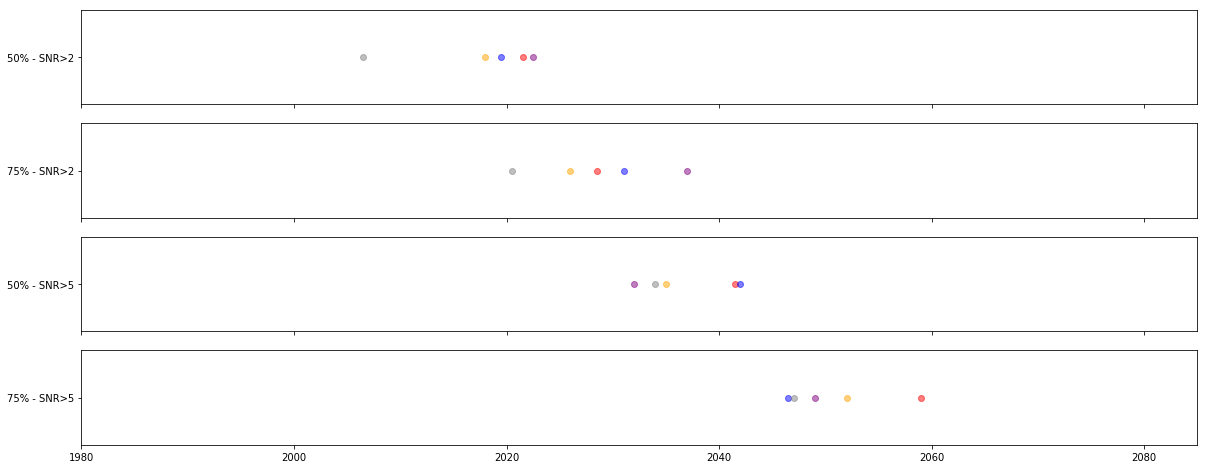

In [143]:
#En fixant les quartiles à 16 et 84

x = [i for i in range(1850,2101)]

nom = ['50% - SNR>2', '75% - SNR>2','50% - SNR>5', '75% - SNR>5']

fig, (ax1,ax2,ax3,ax4) =plt.subplots(4,1, figsize=(20, 8), sharex=True)

axes=[ax1,ax2,ax3,ax4]


for i in range(2):
    axes[i].set_xlim(1980, 2085)


    axes[i].scatter(QUART[0][i], nom[i] , c='red',alpha="0.5")
    axes[i].scatter(QUART[1][i], nom[i] , c='orange',alpha="0.5")
    axes[i].scatter(QUART[2][i], nom[i] , c='blue',alpha="0.5")
    axes[i].scatter(QUART[3][i], nom[i] , c='purple',alpha="0.5")
    axes[i].scatter(QUART[4][i], nom[i] , c='grey',alpha="0.5")
    
for i in range(2):
    axes[i+2].set_xlim(1980, 2085)


    axes[i+2].scatter(QUART_5[0][i], nom[i+2] , c='red',alpha="0.5")
    axes[i+2].scatter(QUART_5[1][i], nom[i+2] , c='orange',alpha="0.5")
    axes[i+2].scatter(QUART_5[2][i], nom[i+2] , c='blue',alpha="0.5")
    axes[i+2].scatter(QUART_5[3][i], nom[i+2] , c='purple',alpha="0.5")
    axes[i+2].scatter(QUART_5[4][i], nom[i+2] , c='grey',alpha="0.5")
    
